<a href="https://colab.research.google.com/github/ZekeThePitcher/Minor-Project/blob/main/Another_copy_of_ensemble_attempt_1_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
link = '/content/drive/MyDrive/ColabNotebooks/data4-100000.csv'
data = pd.read_csv(link)

In [ ]:
data.head(5)

,Unnamed: 0,ended,0,1,2,3,4,5,6,7,...,374,375,376,377,378,379,380,381,382,383
0,0,0,0.112144,-0.024835,0.062954,0.059289,0.059902,0.013061,0.020567,-0.012562,...,0.084198,0.012157,0.010347,-0.001909,0.068593,0.036979,-0.014276,-0.047814,-0.186423,-0.000642
1,1,0,-0.040155,-0.029773,0.039795,0.063586,0.051465,0.062381,-0.035089,-0.019570,...,-0.008494,-0.001888,-0.001198,-0.018533,-0.172899,0.035925,0.080160,0.009349,-0.045357,0.073876
2,2,0,0.129149,0.041479,0.028066,0.031960,0.010417,0.002107,-0.051047,0.106573,...,-0.019327,0.036544,-0.045330,0.033543,0.035930,-0.012167,-0.004636,-0.000542,0.034905,0.063359
3,3,1,-0.083624,0.058547,0.037818,0.029454,0.015685,0.002456,0.018189,0.007847,...,-0.077354,-0.068553,0.014939,-0.048553,0.014945,0.023252,0.042630,-0.121564,-0.094866,-0.005650
4,4,0,-0.040699,0.003687,0.057338,-0.037602,0.089345,0.037959,0.002849,-0.039542,...,0.073939,0.025814,-0.045195,0.034519,0.072605,-0.031004,-0.063632,0.013665,0.056927,-0.038605


In [ ]:
data_y = data['ended']

In [ ]:
data_x = data.drop(columns = ['ended'])

In [ ]:
data_y.head(5)

0    0
1    0
2    0
3    1
4    0
Name: ended, dtype: int64

In [ ]:
data_x.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,0,0.112144,-0.024835,0.062954,0.059289,0.059902,0.013061,0.020567,-0.012562,0.036716,...,0.084198,0.012157,0.010347,-0.001909,0.068593,0.036979,-0.014276,-0.047814,-0.186423,-0.000642
1,1,-0.040155,-0.029773,0.039795,0.063586,0.051465,0.062381,-0.035089,-0.019570,-0.119124,...,-0.008494,-0.001888,-0.001198,-0.018533,-0.172899,0.035925,0.080160,0.009349,-0.045357,0.073876
2,2,0.129149,0.041479,0.028066,0.031960,0.010417,0.002107,-0.051047,0.106573,-0.033472,...,-0.019327,0.036544,-0.045330,0.033543,0.035930,-0.012167,-0.004636,-0.000542,0.034905,0.063359
3,3,-0.083624,0.058547,0.037818,0.029454,0.015685,0.002456,0.018189,0.007847,0.020765,...,-0.077354,-0.068553,0.014939,-0.048553,0.014945,0.023252,0.042630,-0.121564,-0.094866,-0.005650
4,4,-0.040699,0.003687,0.057338,-0.037602,0.089345,0.037959,0.002849,-0.039542,0.007706,...,0.073939,0.025814,-0.045195,0.034519,0.072605,-0.031004,-0.063632,0.013665,0.056927,-0.038605


In [ ]:
data_x = data_x.drop(columns = ['Unnamed: 0'])

In [ ]:
data_x.shape

(100000, 384)

In [ ]:
from tensorflow.keras.preprocessing import sequence

In [ ]:
from tensorflow.keras import layers, models, optimizers

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y)

In [ ]:
train_x.shape

(75000, 384)

In [ ]:
#conv1d_input->conv1d->max_pooling_1d->lstm(64)->dense(128)->dense(64)->dense(32)->o/p
#conv1d_input->conv1d->max_pooling_1d->conv1d->lstm(64)->dense(128)->dense(64)->dense(32)->o/p
#conv1d_input->conv1d->max_pooling_1d->lstm(64)->dropout->dense(128)->dropout->dense(128)->dropout->dense(128)->o/p

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv1D, BatchNormalization, Dropout, GlobalMaxPooling1D, Flatten, Concatenate
from tensorflow.keras.models import Model

In [ ]:
input = Input(shape = (train_x.shape[1],1,))

In [ ]:
conv = Conv1D(128, 1, activation = 'relu')(input)

In [ ]:
conv = Conv1D(128, 1, activation = 'relu')(conv)

In [ ]:
conv = BatchNormalization()(conv)

In [ ]:
conv = Dropout(0.2)(conv)

In [ ]:
maxpool = GlobalMaxPooling1D()(conv)

In [ ]:
flatten = Flatten()(input)

In [ ]:
hidden = Dense(32, activation = 'relu')(flatten)

In [ ]:
hidden = BatchNormalization()(hidden)

In [ ]:
hidden = Dropout(0.2)(hidden)

In [ ]:
concat = Concatenate()([maxpool, hidden])

In [ ]:
output = Dense(1, activation = 'sigmoid')(concat)

In [ ]:
model = Model(inputs = input, outputs = output)

In [ ]:
model = Model(inputs = input, outputs = output)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
accuracy = model.fit(train_x, train_y, epochs = 1, validation_split = 0.1)

2110/2110 [==============================] - 197s 93ms/step - loss: 0.5962 - accuracy: 0.6439 - val_loss: 0.5690 - val_accuracy: 0.6605


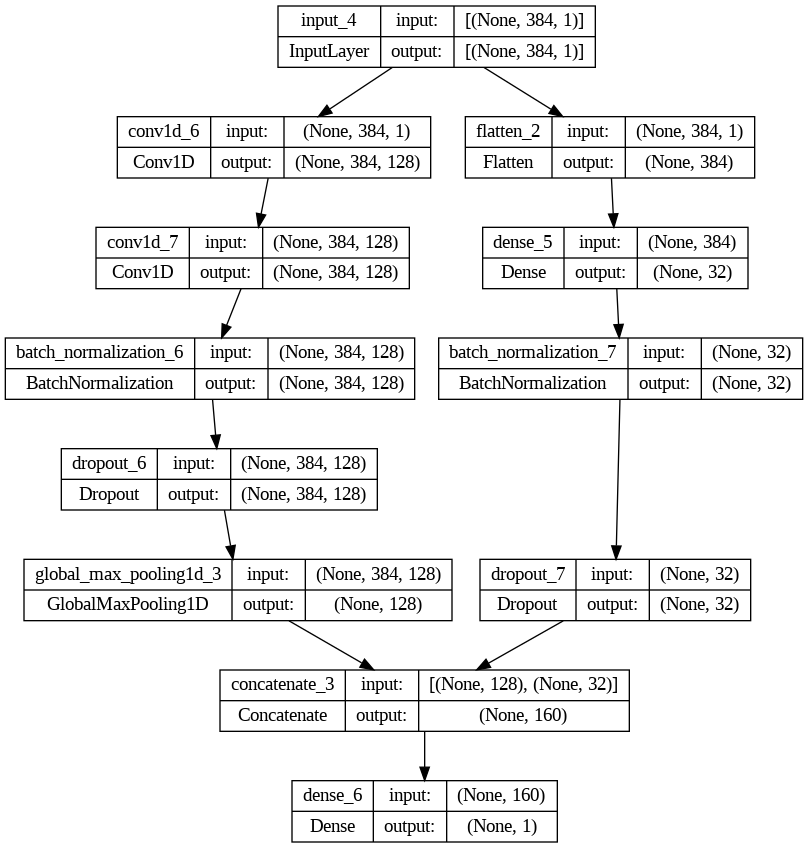

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
pred = model.predict(test_x)

782/782 [==============================] - 8s 10ms/step


In [ ]:
pred

array([[0.543309  ],
       [0.54689175],
       [0.54460657],
       ...,
       [0.5489914 ],
       [0.5444825 ],
       [0.55045635]], dtype=float32)

In [ ]:
pred2 = pred

In [ ]:
pred2 = [1 if i >=0.5 else 0 for i in pred2]

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
mean_squared_error(test_y, pred)

0.2478019821713988

In [ ]:
accuracy_score(test_y, pred2)

0.54632

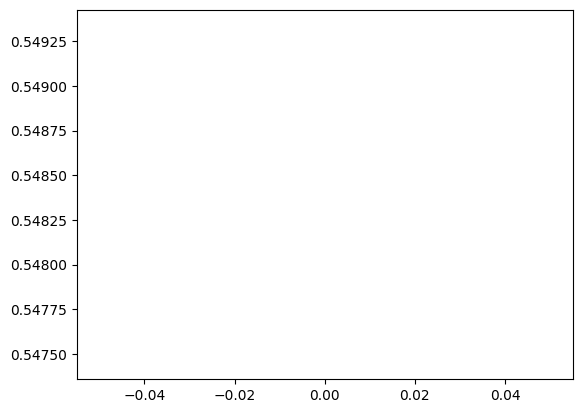

In [ ]:
from matplotlib import pyplot as plt
plt.plot(accuracy.history['accuracy'])
plt.plot(accuracy.history['val_accuracy'])
plt.show()

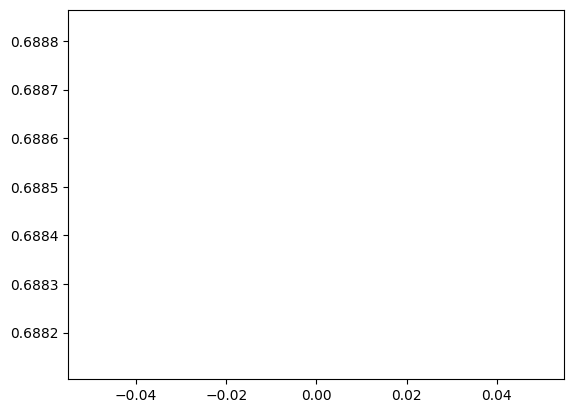

In [ ]:
from matplotlib import pyplot as plt
plt.plot(accuracy.history['loss'])
plt.plot(accuracy.history['val_loss'])
plt.show()

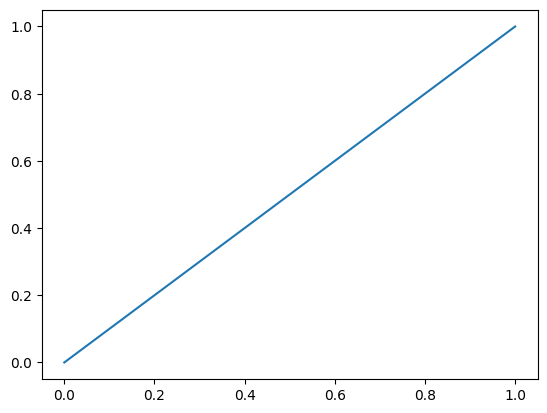

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _=roc_curve(test_y, pred2)
plt.plot(fpr, tpr, label='ROC Curve')

In [ ]:
from sklearn.metrics import classification_report
classification_report(test_y, pred2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00     11342\n           1       0.55      1.00      0.71     13658\n\n    accuracy                           0.55     25000\n   macro avg       0.27      0.50      0.35     25000\nweighted avg       0.30      0.55      0.39     25000\n'

                precision    recall  f1-score   support

           0       0.60      0.83      0.69     11305
           1       0.80      0.53      0.64     13695

    accuracy                           0.67     25000
   macro avg       0.70      0.68      0.67     25000
weighted avg       0.71      0.67      0.66     25000


In [ ]:
print('random behaviour')

In [ ]:
model.save('/content/drive/MyDrive/ColabNotebooks/PickleModel', save_format = "h5")

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))